# Iris Flowers Classification ML Project

### This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('iris.csv')

In [8]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [14]:
#check for null values
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

<AxesSubplot:>

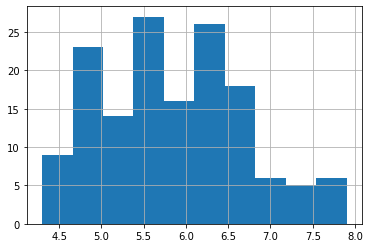

In [15]:
df['sepal.length'].hist()

<AxesSubplot:>

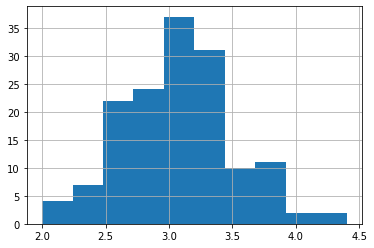

In [16]:
df['sepal.width'].hist()

<AxesSubplot:>

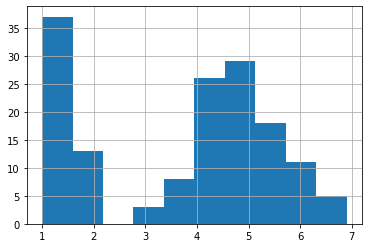

In [17]:
df['petal.length'].hist()

<AxesSubplot:>

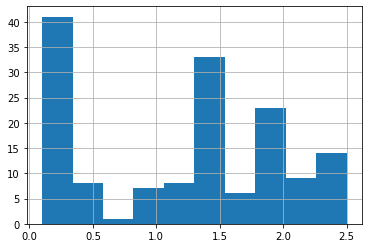

In [18]:
df['petal.width'].hist()

In [23]:
#scatterplot
colors=['red','orange','blue']
var=['Setosa','Versicolor','Virginica']

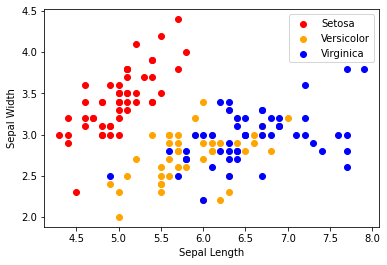

In [26]:
for i in range (3):
    x=df[df['variety']==var[i]]
    plt.scatter(x['sepal.length'],x['sepal.width'],c=colors[i],label=var[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

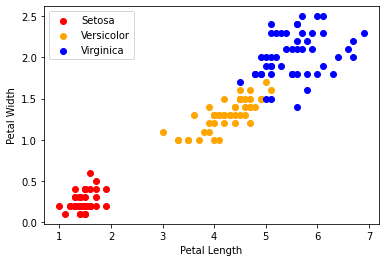

In [27]:
for i in range (3):
    x=df[df['variety']==var[i]]
    plt.scatter(x['petal.length'],x['petal.width'],c=colors[i],label=var[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

In [28]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

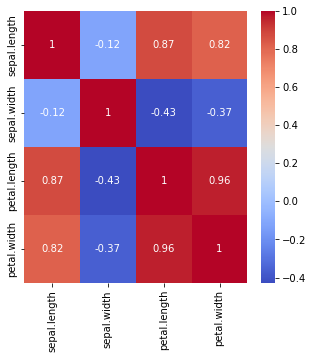

In [35]:
#Correlation Matrix
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [36]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
df['variety']=le.fit_transform(df['variety'])
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [45]:
#model training
from sklearn.model_selection import train_test_split
X=df.drop(columns=['variety'])
Y=df['variety']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [48]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [49]:
model.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
#Print Metric to get performance
print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  100.0
